# Naive Bayes

The goal of this problem is to build naive bayes (NB) models to classify whether each message is spam or not.

The data used in this problem provide frequencies of words for each message.

The column “label” is the target variable, indicating whether each message is spam or not (the label “ham” means that it is not a spam message.).

In [189]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

In [190]:
df = pd.read_csv("./datasets/spam_small.csv")
df.head()

,100,1000,150,150p,150ppm,16,18,1st,2000,2nd,...,weekly,well,went,win,word,work,would,yeah,yes,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,spam
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,spam


In [191]:
x = df.drop("label", axis=1)
y = df["label"]

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, stratify=y)

## Part 1: Bernoulli NB

To build a Bernoulli NB, if a certain word is used in a message, the values of the variables are set to 1; otherwise, they are set to 0.

1-(1) After the conversion, train a Bernoulli NB using training set (alpha=1). Prior probabilities of classes are proportional to ratios of classes in training set. Then, calculate the overall accuracy and accuracy values corresponding to each target class for the training and validation sets, respectively.

In [192]:
x_binary = x.map(lambda count: 1 if count > 0 else 0)
x_train, x_valid, y_train, y_valid = train_test_split(x_binary, y, test_size=0.2, stratify=y)

bernoulli_nb = BernoulliNB(alpha=1)
bernoulli_nb.fit(x_train, y_train)

###################### Prediction ######################## 

y_train_prediction = bernoulli_nb.predict(x_train)
train_accuracy = (y_train == y_train_prediction).mean()

y_valid_prediction = bernoulli_nb.predict(x_valid)
valid_accuracy = (y_valid == y_valid_prediction).mean()

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {valid_accuracy}")


###################### Accuracy of Class ######################## 
def calculate_accuracy(y_true, y_prediction, class_label):
    return (y_true[y_true == class_label] == y_prediction[y_true == class_label]).mean()

spam_train_accuracy = calculate_accuracy(y_train, y_train_prediction, 'spam') 
spam_valid_accuracy = calculate_accuracy(y_valid, y_valid_prediction, 'spam')

ham_train_accuracy = calculate_accuracy(y_train, y_train_prediction, 'ham')
ham_valid_accuracy = calculate_accuracy(y_valid, y_valid_prediction, 'ham')

print()
print("Spam Training Accuracy : ", spam_train_accuracy)
print("Spam Validation Accuracy : ", spam_valid_accuracy)
print("Ham Training Accuracy : ", ham_train_accuracy)
print("Ham Validation Accuracy : ", ham_valid_accuracy)

Training Accuracy: 0.9551466359976998
Validation Accuracy: 0.960919540229885

Spam Training Accuracy :  0.7508960573476703
Spam Validation Accuracy :  0.762589928057554
Ham Training Accuracy :  0.9941780821917808
Ham Validation Accuracy :  0.9986320109439124


1-(2) Find the top 10 most probable words in each class according to the model trained in 1-(1) and summarize them with the probability of existence of words in the following tables.

In [193]:
# Get the feature names
features = x.columns

# Get the counts of features given each class
spam_count = bernoulli_nb.feature_count_[1]
ham_count = bernoulli_nb.feature_count_[0]

# Convert counts to probabilities
spam_p = spam_count / spam_count.sum()
ham_p = ham_count / ham_count.sum()

# Get the top 10 words for each class
top_10_spam = spam_p.argsort()[-10:][::-1]
top_10_ham = ham_p.argsort()[-10:][::-1]

top_10_spam_words = features[top_10_spam]
top_10_ham_words = features[top_10_ham]

print("Spam Top 10 : ")
for word, p in zip(top_10_spam_words, spam_p[top_10_spam]):
    print(f"{word}: {p:.4f}")

print()

print("Ham Top 10 : ")
for word, p in zip(top_10_ham_words, ham_p[top_10_ham]):
    print(f"{word}: {p:.4f}")

Spam Top 10 : 
call: 0.0608
mobile: 0.0337
prize: 0.0271
claim: 0.0266
txt: 0.0244
text: 0.0226
contact: 0.0213
16: 0.0200
free: 0.0182
reply: 0.0178

Ham Top 10 : 
get: 0.0313
ltgt: 0.0253
know: 0.0246
go: 0.0233
come: 0.0233
like: 0.0227
got: 0.0222
call: 0.0221
day: 0.0195
time: 0.0189


1-(3) Find the top 10 words whose probability of existence high in spam, but low in ham according to the model trained in 1-(1). In addition, find the top 10 words whose probability of existence is high in ham, but low in spam.

In [194]:
# Calculate difference in probabilities
p_spam_ham = spam_p - ham_p
p_ham_spam = ham_p - spam_p

# Get the top 10 words for each case
top_10_spam_high_diff = p_spam_ham.argsort()[-10:][::-1]
top_10_ham_high_diff = p_ham_spam.argsort()[-10:][::-1]

top_10_spam_high_diff_words = features[top_10_spam_high_diff]
top_10_ham_high_diff_words = features[top_10_ham_high_diff]

print("Top 10 with high probability in Spam & low in Ham:")
for word, diff in zip(top_10_spam_high_diff_words, p_spam_ham[top_10_spam_high_diff]):
    print(f"{word}: {diff:.4f}")

print()

print("Top 10 words with high probability in Ham & low in Spam:")
for word, diff in zip(top_10_ham_high_diff_words, p_ham_spam[top_10_ham_high_diff]):
    print(f"{word}: {diff:.4f}")

Top 10 with high probability in Spam & low in Ham:
call: 0.0387
mobile: 0.0321
prize: 0.0271
claim: 0.0266
txt: 0.0235
16: 0.0198
contact: 0.0197
text: 0.0161
18: 0.0160
awarded: 0.0151

Top 10 words with high probability in Ham & low in Spam:
ltgt: 0.0253
come: 0.0228
got: 0.0205
go: 0.0184
like: 0.0182
home: 0.0181
lor: 0.0171
day: 0.0168
going: 0.0167
know: 0.0166


## Part 2: Multinomial NB

2-(1) Train a multinomial NB using training set (x_train, y_train) (alpha=1). Prior probabilities of classes are proportional to ratios of classes in training set. Then calculate the overall accuracy and accuracy values corresponding to each target class for the training and validation sets, respectively.

In [195]:
multinomial_nb = MultinomialNB(alpha=1)
multinomial_nb.fit(x_train, y_train)

y_train_prediction = multinomial_nb.predict(x_train)
y_valid_prediction = multinomial_nb.predict(x_valid)

train_accuracy = (y_train == y_train_prediction).mean()
valid_accuracy = (y_valid == y_valid_prediction).mean()

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {valid_accuracy}")


spam_train_accuracy = calculate_accuracy(y_train, y_train_prediction, 'spam') 
spam_valid_accuracy = calculate_accuracy(y_valid, y_valid_prediction, 'spam')

ham_train_accuracy = calculate_accuracy(y_train, y_train_prediction, 'ham')
ham_valid_accuracy = calculate_accuracy(y_valid, y_valid_prediction, 'ham')

print()
print("Spam Training Accuracy : ", spam_train_accuracy)
print("Spam Validation Accuracy : ", spam_valid_accuracy)
print("Ham Training Accuracy : ", ham_train_accuracy)
print("Ham Validation Accuracy : ", ham_valid_accuracy)

Training Accuracy: 0.9583093732029903
Validation Accuracy: 0.9620689655172414

Spam Training Accuracy :  0.8261648745519713
Spam Validation Accuracy :  0.7985611510791367
Ham Training Accuracy :  0.9835616438356164
Ham Validation Accuracy :  0.9931600547195623


2-(2) Find the top 10 most probable words in each target according to the model trained in 2-(1) and summarize them with the probability of existence of words in the following tables.

In [196]:
spam_log_prob = multinomial_nb.feature_log_prob_[1]
ham_log_prob = multinomial_nb.feature_log_prob_[0]
# Get the top 10 words for each class
spam_word_prob = np.exp(spam_log_prob)
ham_word_prob = np.exp(ham_log_prob)

top_10_spam_indices = spam_word_prob.argsort()[-10:][::-1]
top_10_ham_indices = ham_word_prob.argsort()[-10:][::-1]

top_10_spam_words = features[top_10_spam_indices]
top_10_ham_words = features[top_10_ham_indices]

print("Top 10 words in Spam messages:")
for word, prob in zip(top_10_spam_words, spam_word_prob[top_10_spam_indices]):
    print(f"{word}: {prob:.4f}")

print("\nTop 10 words in Ham messages:")
for word, prob in zip(top_10_ham_words, ham_word_prob[top_10_ham_indices]):
    print(f"{word}: {prob:.4f}")

Top 10 words in Spam messages:
call: 0.0569
mobile: 0.0318
prize: 0.0256
claim: 0.0252
txt: 0.0231
text: 0.0214
contact: 0.0202
16: 0.0190
free: 0.0173
reply: 0.0169

Top 10 words in Ham messages:
get: 0.0307
ltgt: 0.0248
know: 0.0241
go: 0.0228
come: 0.0228
like: 0.0223
got: 0.0218
call: 0.0217
day: 0.0191
time: 0.0186


2-(3) Find the top 10 words whose probability of existence is high in spam but in low in ham according to the model trained in 2-(1). In addition, find the top 10 words whose probability of existence is high in ham but low in spam.

In [197]:
p_diff_spam_ham = spam_word_p - ham_word_p
p_diff_ham_spam = ham_word_p - spam_word_p

top_10_spam_high_diff = p_diff_spam_ham.argsort()[-10:][::-1]
top_10_ham_high_diff = p_diff_ham_spam.argsort()[-10:][::-1]

top_10_spam_high_diff_words = features[top_10_spam_high_diff]
top_10_ham_high_diff_words = features[top_10_ham_high_diff]

print("Top 10 words with high pability in Spam & low in Ham:")
for word, diff in zip(top_10_spam_high_diff_words, p_diff_spam_ham[top_10_spam_high_diff]):
    print(f"{word}: {diff:.4f}")

print()

print("\nTop 10 words with high pability in Ham & low in Spam:")
for word, diff in zip(top_10_ham_high_diff_words, p_diff_ham_spam[top_10_ham_high_diff]):
    print(f"{word}: {diff:.4f}")

Top 10 words with high pability in Spam & low in Ham:
call: 0.0400
mobile: 0.0297
claim: 0.0260
txt: 0.0238
prize: 0.0201
text: 0.0191
16: 0.0181
contact: 0.0172
service: 0.0167
reply: 0.0164


Top 10 words with high pability in Ham & low in Spam:
ltgt: 0.0250
got: 0.0233
come: 0.0230
go: 0.0190
like: 0.0189
home: 0.0183
know: 0.0167
lor: 0.0164
day: 0.0151
going: 0.0151


# 2. Decision tree

In this question, you have to train decision tree models to classify whether the client has subscribed a term deposit or not ("y"). If the client has subscribed a term deposit, the target variable would be 1, or 0 otherwise.

* Y: dependent variable, indicating whether the client has subscribed a term deposit (binary: yes or no)
* age: age in years
* job: type of job (nominal: 11 categories)
* marital: marital status (nominal: 3 categories)
* education: education level (nominal: 4 categories)
* default: has credit in default? (binary: yes or no)
* balance: average yearly balance in euros
* housing: has housing loan? (binary: yes or no)
* loan: has personal loan? (binary: yes or no)
* contact: contact communication type (nominal: 3 categories)
* day: last contact day of the month
* month: last contact month of year
* duration: last contact duration, in seconds
* campaign: number of contacts performed during this campaign and for this client including last contact
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric: -1 means that client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client
* poutcome: outcome of the previous marketing campaign (nominal: 4 categories)

In [198]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [199]:
df = pd.read_csv("./datasets/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [200]:
x = df.drop("y", axis=1)
y = df["y"]

In [201]:
x = pd.get_dummies(x, columns=list(x.select_dtypes("object").columns), drop_first=True)

In [202]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, stratify=y)

(1) Train decision tree models by different maximum depth {1, 2, 3, 4, 5} with min_samples_leaf=10 and the Gini impurity for the criterion to determine the best split, using a training set (x_train, y_train). Then, calculate the accuracy of the models using a validation set (x_valid, y_valid) for overall samples and individual classes, and fill the following table.

In [203]:
depths = [1, 2, 3, 4, 5]
train_accuracies = []
valid_accuracies = []
train_class_accuracies = {depth: {} for depth in depths}
valid_class_accuracies = {depth: {} for depth in depths}

for depth in depths:
    decision_tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=10, criterion='gini')
    decision_tree.fit(x_train, y_train)
    
    y_train_prediction = decision_tree.predict(x_train)
    y_valid_prediction = decision_tree.predict(x_valid)
    
    train_accuracy = (y_train == y_train_prediction).mean()
    valid_accuracy = (y_valid == y_valid_prediction).mean()
    
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)
    
    for label in y_train.unique():
        train_class_accuracies[depth][label] = calculate_accuracy(y_train, y_train_prediction, label)
        valid_class_accuracies[depth][label] = calculate_accuracy(y_valid, y_valid_prediction, label)

# Print the results
print("Max Depth\tTraining Accuracy\tValidation Accuracy")
for depth, train_accuracy, valid_accuracy in zip(depths, train_accuracies, valid_accuracies):
    print(f"{depth}\t{train_accuracy:.4f}\t{valid_accuracy:.4f}")

print()

print("Training Accuracy : ")
for depth in depths:
    print()
    print(f"Max Depth: {depth}")
    for label, accuracy in train_class_accuracies[depth].items():
        print(f"Class {label}: {accuracy:.4f}")

print()

print("Validation Accuracy : ")
for depth in depths:
    print()
    print(f"Max Depth: {depth}")
    for label, accuracy in valid_class_accuracies[depth].items():
        print(f"Class {label}: {accuracy:.4f}")
        



Max Depth	Training Accuracy	Validation Accuracy
1	0.8830	0.8830
2	0.8893	0.8965
3	0.8984	0.9057
4	0.9007	0.9073
5	0.9028	0.9063

Training Accuracy : 

Max Depth: 1
Class no: 1.0000
Class yes: 0.0000

Max Depth: 2
Class no: 0.9485
Class yes: 0.4422

Max Depth: 3
Class no: 0.9659
Class yes: 0.3890

Max Depth: 4
Class no: 0.9711
Class yes: 0.3694

Max Depth: 5
Class no: 0.9784
Class yes: 0.3321

Validation Accuracy : 

Max Depth: 1
Class no: 1.0000
Class yes: 0.0000

Max Depth: 2
Class no: 0.9512
Class yes: 0.4839

Max Depth: 3
Class no: 0.9677
Class yes: 0.4376

Max Depth: 4
Class no: 0.9724
Class yes: 0.4159

Max Depth: 5
Class no: 0.9772
Class yes: 0.3715


In [204]:
train_accuracies = []
valid_accuracies = []
train_class_accuracies = {depth: {} for depth in depths}
valid_class_accuracies = {depth: {} for depth in depths}

for depth in depths:
    decision_tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=10, criterion='entropy')
    decision_tree.fit(x_train, y_train)
    
    y_train_prediction = decision_tree.predict(x_train)
    y_valid_prediction = decision_tree.predict(x_valid)
    
    train_accuracy = (y_train == y_train_prediction).mean()
    valid_accuracy = (y_valid == y_valid_prediction).mean()
    
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)
    
    for label in y_train.unique():
        train_class_accuracies[depth][label] = calculate_accuracy(y_train, y_train_prediction, label)
        valid_class_accuracies[depth][label] = calculate_accuracy(y_valid, y_valid_prediction, label)

print("Max Depth\tTraining Accuracy\tValidation Accuracy")
for depth, train_accuracy, valid_accuracy in zip(depths, train_accuracies, valid_accuracies):
    print(f"{depth}\t{train_accuracy:.4f}\t{valid_accuracy:.4f}")

print()

print("Training Accuracy :")
for depth in depths:
    print()
    print(f"Max Depth: {depth}")
    for label, accuracy in train_class_accuracies[depth].items():
        print(f"Class {label}: {accuracy:.4f}")

print()

print("Validation Accuracy :")
for depth in depths:
    print()
    print(f"Max Depth: {depth}")
    for label, accuracy in valid_class_accuracies[depth].items():
        print(f"Class {label}: {accuracy:.4f}")

Max Depth	Training Accuracy	Validation Accuracy
1	0.8830	0.8830
2	0.8892	0.8965
3	0.8984	0.9057
4	0.8993	0.9076
5	0.9016	0.9069

Training Accuracy :

Max Depth: 1
Class no: 1.0000
Class yes: 0.0000

Max Depth: 2
Class no: 0.9486
Class yes: 0.4410

Max Depth: 3
Class no: 0.9659
Class yes: 0.3890

Max Depth: 4
Class no: 0.9728
Class yes: 0.3448

Max Depth: 5
Class no: 0.9794
Class yes: 0.3139

Validation Accuracy :

Max Depth: 1
Class no: 1.0000
Class yes: 0.0000

Max Depth: 2
Class no: 0.9512
Class yes: 0.4839

Max Depth: 3
Class no: 0.9677
Class yes: 0.4376

Max Depth: 4
Class no: 0.9755
Class yes: 0.3951

Max Depth: 5
Class no: 0.9798
Class yes: 0.3563


(3) Draw the trained tree with feature names when the maximum depth is set to 3.

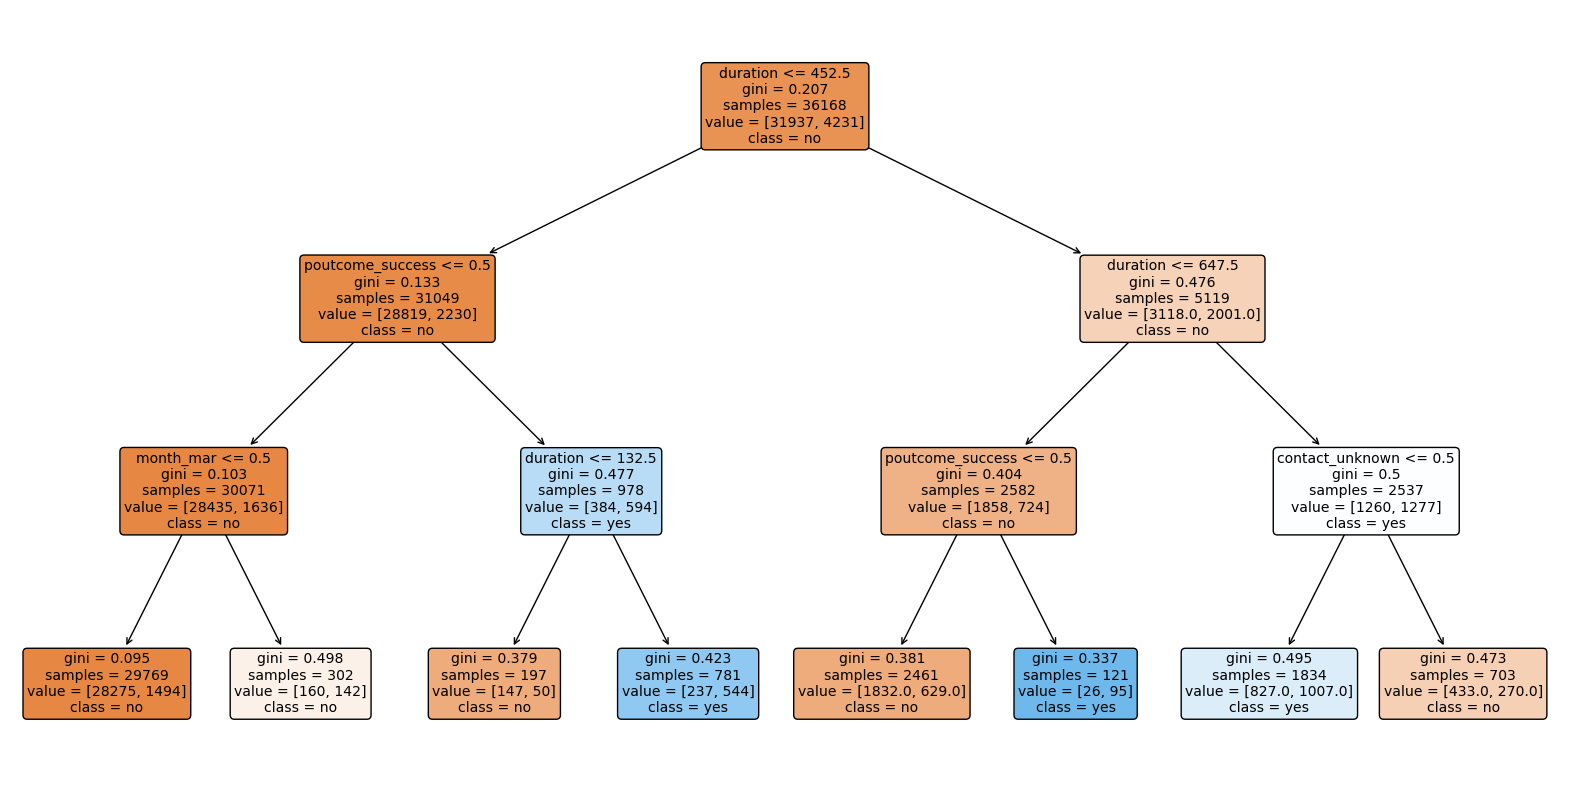

In [205]:
decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, criterion='gini')
decision_tree.fit(x_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=x.columns, class_names=y.unique(), filled=True, rounded=True)
plt.show()

(4) Train decision tree models by different maximum depth (1, 2, 3, 4, 5) with min_samples_leaf = 10 and the entropy impurity for the criterion to determine the best split, using a training set (x_train, y_train). Then, calculate the accuracy of the models using a validation set (x_valid, y_valid) for overall samples and individual classes, and fill the following table.

In [206]:
depths = [1, 2, 3, 4, 5]
train_accuracies = []
valid_accuracies = []

for depth in depths:
    decision_tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=10, criterion='entropy')
    decision_tree.fit(x_train, y_train)
    
    y_train_prediction = decision_tree.predict(x_train)
    y_valid_prediction = decision_tree.predict(x_valid)
    
    train_accuracy = (y_train == y_train_prediction).mean()
    valid_accuracy = (y_valid == y_valid_prediction).mean()
    
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)

print("Max Depth\tTraining Accuracy\tValidation Accuracy")
for depth, train_accuracy, valid_accuracy in zip(depths, train_accuracies, valid_accuracies):
    print(f"{depth}\t{train_accuracy:.4f}\t{valid_accuracy:.4f}")
    
print("Training Accuracy : ")
for depth in depths:
    print()
    print(f"Max Depth: {depth}")
    for label, accuracy in train_class_accuracies[depth].items():
        print(f"Class {label}: {accuracy:.4f}")

print()

print("Validation Accuracy : ")
for depth in depths:
    print()
    print(f"Max Depth: {depth}")
    for label, accuracy in valid_class_accuracies[depth].items():
        print(f"Class {label}: {accuracy:.4f}")


Max Depth	Training Accuracy	Validation Accuracy
1	0.8830	0.8830
2	0.8892	0.8965
3	0.8984	0.9057
4	0.8993	0.9076
5	0.9016	0.9069
Training Accuracy : 

Max Depth: 1
Class no: 1.0000
Class yes: 0.0000

Max Depth: 2
Class no: 0.9486
Class yes: 0.4410

Max Depth: 3
Class no: 0.9659
Class yes: 0.3890

Max Depth: 4
Class no: 0.9728
Class yes: 0.3448

Max Depth: 5
Class no: 0.9794
Class yes: 0.3139

Validation Accuracy : 

Max Depth: 1
Class no: 1.0000
Class yes: 0.0000

Max Depth: 2
Class no: 0.9512
Class yes: 0.4839

Max Depth: 3
Class no: 0.9677
Class yes: 0.4376

Max Depth: 4
Class no: 0.9755
Class yes: 0.3951

Max Depth: 5
Class no: 0.9798
Class yes: 0.3563


# 3. k-means clustering

This problem uses data generated from several normal distributions to apply k-means clustering.

In [207]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [208]:
df = pd.read_csv("./datasets/syn_unbalance.csv", header=None)
df.shape

(6500, 2)

In [209]:
x = df.to_numpy()

(1) Select randomly k(=3, ..., 10) samples from the given dataset and use them as initial centroids. This procedure is repeated for 10 times for each k. You need to report the average and standard deviation of silhouette coefficient values of 10 iterations for each k.

In [210]:
def calculate_silhouette_scores(x, k_range, n_init=10):
    silhouette_avg = []
    silhouette_std = []
    
    for k in k_range:
        silhouette_scores = []
        for _ in range(n_init):
            kmeans = KMeans(n_clusters=k, init='random', n_init=1, random_state=None)
            cluster_labels = kmeans.fit_predict(x)
            silhouette_scores.append(silhouette_score(x, cluster_labels))
        
        silhouette_avg.append(np.mean(silhouette_scores))
        silhouette_std.append(np.std(silhouette_scores))
    
    return silhouette_avg, silhouette_std

k_range = list(range(3, 11))
silhouette_avg, silhouette_std = calculate_silhouette_scores(x, k_range)

print("k\tAvg Score\tStd")
for k, avg, std in zip(k_range, silhouette_avg, silhouette_std):
    print(f"{k}\t{avg:.4f}\t{std:.4f}")

k	Avg Score	Std
3	0.6283	0.0548
4	0.7754	0.1588
5	0.6568	0.0674
6	0.5938	0.0936
7	0.5442	0.1271
8	0.4462	0.1008
9	0.4599	0.0781
10	0.4887	0.1103


(2) Use the default initialization strategy "k-means++". This procedure is repeated for 10 times. Then, calculate the average and standard deviation silhouette coefficient values of 10 iterations for each k.

In [211]:
def calculate_silhouette_scores_pp(x, k_range, n_init=10):
    silhouette_avg = []
    silhouette_std = []
    
    for k in k_range:
        silhouette_scores = []
        for _ in range(n_init):
            kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1, random_state=None)
            cluster_labels = kmeans.fit_predict(x)
            silhouette_scores.append(silhouette_score(x, cluster_labels))
        
        silhouette_avg.append(np.mean(silhouette_scores))
        silhouette_std.append(np.std(silhouette_scores))
    
    return silhouette_avg, silhouette_std

silhouette_avg_pp, silhouette_std_pp = calculate_silhouette_scores_pp(x, k_range)

print("k\tAverage Silhouette Score (k-means++)\tStandard Deviation")
for k, avg, std in zip(k_range, silhouette_avg_pp, silhouette_std_pp):
    print(f"{k}\t{avg:.4f}\t{std:.4f}")

k	Average Silhouette Score (k-means++)	Standard Deviation
3	0.6465	0.0007
4	0.7853	0.1061
5	0.8303	0.0014
6	0.8389	0.0017
7	0.8497	0.0004
8	0.8578	0.0000
9	0.7039	0.0490
10	0.6305	0.0763


(3) Draw scatter plots for the given data with initial centroids and final centroids for the worst and best number of clusters among k=3,...,10 in (1) in terms of silhouette coefficient. The final centroids should be marked as blue "X".

Worst k (random): 8
Best k (random): 4


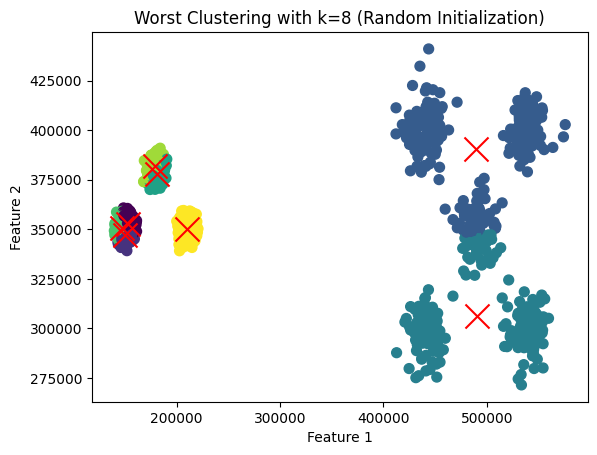

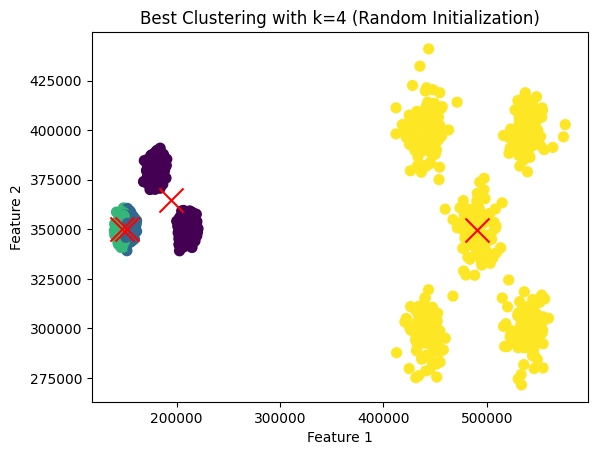

In [212]:
def plot_clusters(x, k, init_method, title):
    kmeans = KMeans(n_clusters=k, init=init_method, n_init=1, random_state=None)
    cluster_labels = kmeans.fit_predict(x)
    
    plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, s=50, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

worst_k = k_range[np.argmin(silhouette_avg)]
best_k = k_range[np.argmax(silhouette_avg)]

print(f"Worst k (random): {worst_k}")
print(f"Best k (random): {best_k}")

plot_clusters(x, worst_k, 'random', f'Worst Clustering with k={worst_k} (Random Initialization)')
plot_clusters(x, best_k, 'random', f'Best Clustering with k={best_k} (Random Initialization)')

(4) Draw scatter plots for the worst and best number of clusters among k=3,...,10 of question (2) in the same way as in question (3). Do not need to plot initial centroids.

Worst k (k-means++): 10
Best k (k-means++): 8


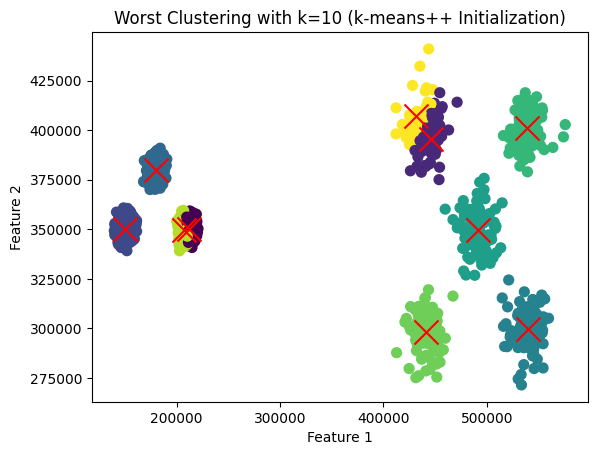

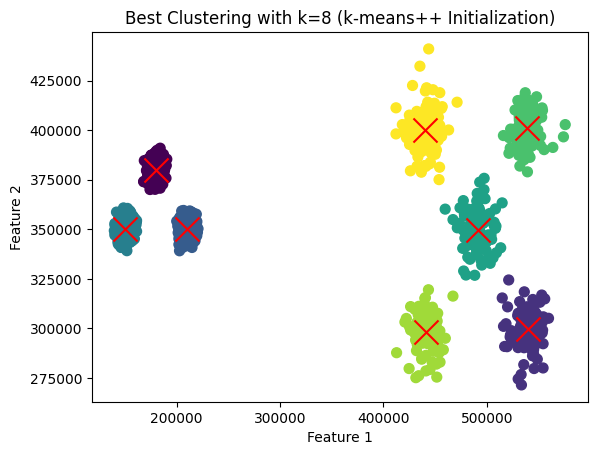

In [213]:
worst_k_pp = k_range[np.argmin(silhouette_avg_pp)]
best_k_pp = k_range[np.argmax(silhouette_avg_pp)]

print(f"Worst k (k-means++): {worst_k_pp}")
print(f"Best k (k-means++): {best_k_pp}")

plot_clusters(x, worst_k_pp, 'k-means++', f'Worst Clustering with k={worst_k_pp} (k-means++ Initialization)')
plot_clusters(x, best_k_pp, 'k-means++', f'Best Clustering with k={best_k_pp} (k-means++ Initialization)')